In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
df = pd.read_csv('LigaEspanola2023-2024-Resultados.csv')
df[:10]

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
0,33,2024-04-29 00:00:00,Barcelona,Valencia,4,2,6,Home
1,33,2024-04-28 00:00:00,Betis,Sevilla,1,1,2,Tie
2,33,2024-04-28 00:00:00,Villarreal,Rayo Vallecano,3,0,3,Home
3,33,2024-04-28 00:00:00,Granada CF,Osasuna,3,0,3,Home
4,33,2024-04-28 00:00:00,Cadiz CF,Mallorca,1,1,2,Tie
5,33,2024-04-27 00:00:00,Atl. Madrid,Ath Bilbao,3,1,4,Home
6,33,2024-04-27 00:00:00,Alaves,Celta Vigo,3,0,3,Home
7,33,2024-04-27 00:00:00,Almeria,Getafe,1,3,4,Away
8,33,2024-04-27 00:00:00,Las Palmas,Girona,0,2,2,Away
9,33,2024-04-26 00:00:00,Real Sociedad,Real Madrid,0,1,1,Away


In [3]:
# Jornadas de Celta que faltan en el csv.

jornadas_faltantes = pd.DataFrame([
    {'Round':34, 'Date':"2024-05-05 00:00:00", 'Home Team':"Celta Vigo", 'Away Team':"Villarreal", 'Home Score':"3", 'Away Score':"2", 'Total Goals':"5", 'Result':"Home"},
    {'Round':35, 'Date':"2024-05-12 00:00:00", 'Home Team':"Atl. Madrid", 'Away Team':"Celta Vigo", 'Home Score':"1", 'Away Score':"0", 'Total Goals':"1", 'Result':"Home"},
    {'Round':36, 'Date':"2024-05-15 00:00:00", 'Home Team':"Celta Vigo", 'Away Team':"Ath Bilbao", 'Home Score':"2", 'Away Score':"1", 'Total Goals':"3", 'Result':"Home"},
    {'Round':37, 'Date':"2024-05-19 00:00:00", 'Home Team':"Granada CF", 'Away Team':"Celta Vigo", 'Home Score':"1", 'Away Score':"2", 'Total Goals':"3", 'Result':"Away"},
    {'Round':38, 'Date':"2024-05-15 00:00:00", 'Home Team':"Celta Vigo", 'Away Team':"Valencia", 'Home Score':"2", 'Away Score':"2", 'Total Goals':"4", 'Result':"Tie"},
    
])
df = pd.concat([df, jornadas_faltantes], ignore_index=True)
df

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
0,33,2024-04-29 00:00:00,Barcelona,Valencia,4,2,6,Home
1,33,2024-04-28 00:00:00,Betis,Sevilla,1,1,2,Tie
2,33,2024-04-28 00:00:00,Villarreal,Rayo Vallecano,3,0,3,Home
3,33,2024-04-28 00:00:00,Granada CF,Osasuna,3,0,3,Home
4,33,2024-04-28 00:00:00,Cadiz CF,Mallorca,1,1,2,Tie
...,...,...,...,...,...,...,...,...
330,34,2024-05-05 00:00:00,Celta Vigo,Villarreal,3,2,5,Home
331,35,2024-05-12 00:00:00,Atl. Madrid,Celta Vigo,1,0,1,Home
332,36,2024-05-15 00:00:00,Celta Vigo,Ath Bilbao,2,1,3,Home
333,37,2024-05-19 00:00:00,Granada CF,Celta Vigo,1,2,3,Away


In [4]:
df.dropna(inplace=True)

In [5]:
# sumatorio de datos no nulos
total = df.notnull().sum().sort_values(ascending= False)
total

Round          335
Date           335
Home Team      335
Away Team      335
Home Score     335
Away Score     335
Total Goals    335
Result         335
dtype: int64

In [6]:
# porcentaje de valores nulos:
percentage = (df.isnull().sum() / df.isnull().count()).sort_values(ascending= True)
percentage

Round          0.0
Date           0.0
Home Team      0.0
Away Team      0.0
Home Score     0.0
Away Score     0.0
Total Goals    0.0
Result         0.0
dtype: float64

In [7]:
# Construcción Df de las series totales y sus porcentajes de valores nulos:

missing_dates=  pd.concat([total, percentage], axis= 1, keys= ['Total Dates', 'Percentage missing dates'])
missing_dates

,Total Dates,Percentage missing dates
Round,335,0.0
Date,335,0.0
Home Team,335,0.0
Away Team,335,0.0
Home Score,335,0.0
Away Score,335,0.0
Total Goals,335,0.0
Result,335,0.0


In [8]:
# Estadisticas descriptivas:

df.describe()

,Round
count,335.000000
mean,17.283582
std,9.743424
min,1.000000
25%,9.000000
50%,17.000000
75%,26.000000
max,38.000000


In [9]:
# dimensiones del DF:
df.shape

(335, 8)

In [10]:
df.info

<bound method DataFrame.info of      Round                 Date    Home Team       Away Team Home Score  \
0       33  2024-04-29 00:00:00    Barcelona        Valencia          4   
1       33  2024-04-28 00:00:00        Betis         Sevilla          1   
2       33  2024-04-28 00:00:00   Villarreal  Rayo Vallecano          3   
3       33  2024-04-28 00:00:00   Granada CF         Osasuna          3   
4       33  2024-04-28 00:00:00     Cadiz CF        Mallorca          1   
..     ...                  ...          ...             ...        ...   
330     34  2024-05-05 00:00:00   Celta Vigo      Villarreal          3   
331     35  2024-05-12 00:00:00  Atl. Madrid      Celta Vigo          1   
332     36  2024-05-15 00:00:00   Celta Vigo      Ath Bilbao          2   
333     37  2024-05-19 00:00:00   Granada CF      Celta Vigo          1   
334     38  2024-05-15 00:00:00   Celta Vigo        Valencia          2   

    Away Score Total Goals Result  
0            2           6   Ho

In [11]:
# número de columnas de df:
df.columns

Index(['Round', 'Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score',
       'Total Goals', 'Result'],
      dtype='object')

In [12]:
# Analisis de la temporada del Celta de Vigo y del cambio de entrenador.
# Resultados Celta de Vigo en Balaidos:

In [13]:
celta_home = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Home')]
celta_home

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
18,32,2024-04-20 00:00:00,Celta Vigo,Las Palmas,4,1,5,Home
70,27,2024-03-01 00:00:00,Celta Vigo,Almeria,1,0,1,Home
144,19,2024-01-03 00:00:00,Celta Vigo,Betis,2,1,3,Home
169,17,2023-12-16 00:00:00,Celta Vigo,Granada CF,1,0,1,Home
330,34,2024-05-05 00:00:00,Celta Vigo,Villarreal,3,2,5,Home
332,36,2024-05-15 00:00:00,Celta Vigo,Ath Bilbao,2,1,3,Home


In [14]:
celta_home_away = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Away')]
celta_home_away

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
86,25,2024-02-17 00:00:00,Celta Vigo,Barcelona,1,2,3,Away
117,22,2024-01-28 00:00:00,Celta Vigo,Girona,0,1,1,Away
128,21,2024-01-20 00:00:00,Celta Vigo,Real Sociedad,0,1,1,Away
236,10,2023-10-21 00:00:00,Celta Vigo,Atl. Madrid,0,3,3,Away
287,5,2023-09-16 00:00:00,Celta Vigo,Mallorca,0,1,1,Away
308,3,2023-08-25 00:00:00,Celta Vigo,Real Madrid,0,1,1,Away
324,1,2023-08-13 00:00:00,Celta Vigo,Osasuna,0,2,2,Away


In [15]:
celta_home_tie = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Tie')]
celta_home_tie

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
35,30,2024-03-31 00:00:00,Celta Vigo,Rayo Vallecano,0,0,0,Tie
181,15,2023-12-04 00:00:00,Celta Vigo,Cadiz CF,1,1,2,Tie
217,12,2023-11-04 00:00:00,Celta Vigo,Sevilla,1,1,2,Tie
243,9,2023-10-08 00:00:00,Celta Vigo,Getafe,2,2,4,Tie
262,7,2023-09-28 00:00:00,Celta Vigo,Alaves,1,1,2,Tie
334,38,2024-05-15 00:00:00,Celta Vigo,Valencia,2,2,4,Tie


In [16]:
# Calculamos el número de resultados en Balaidos:

victory_home = (celta_home['Result'] == 'Home').sum()
away_home = (celta_home_away['Result'] == 'Away').sum()
tie_home = (celta_home_tie['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta en Balaidos: ', victory_home)
print(f'Total de derrotas del Celta en Balaidos: ', away_home)
print(f'Total de empates del Celta en Balaidos: ', tie_home)

Total de victorias del Celta en Balaidos:  6
Total de derrotas del Celta en Balaidos:  7
Total de empates del Celta en Balaidos:  6


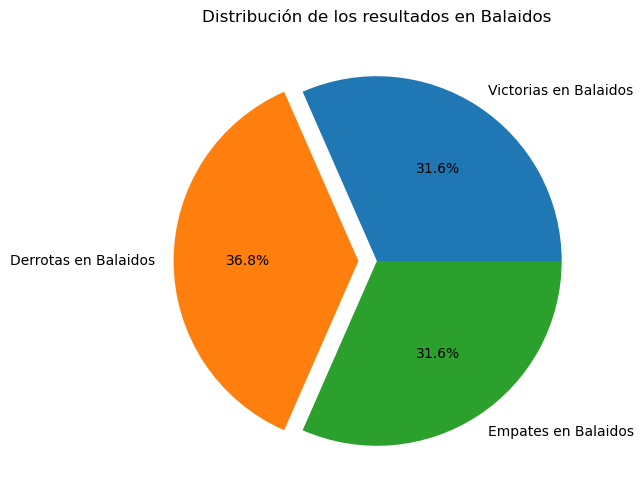

In [17]:
# Representado en gráfico por conjunto de resultados con sus valores del Celta como local:

plt.figure(figsize=(10, 6))

labels= ['Victorias en Balaidos', 'Derrotas en Balaidos', 'Empates en Balaidos']
sizes= [victory_home, away_home, tie_home]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados en Balaidos')

plt.show()

In [18]:
# Puntos conseguidos en Balaidos:

points_home_Balaidos = (celta_home['Result'] == 'Home').sum() *3 + (celta_home_tie['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos en Balaidos: ', points_home_Balaidos)

Total puntos conseguidos en Balaidos:  24


In [19]:
# Promedio de puntos conseguidos como local:

num_matches_home_celta = df.loc [(df['Home Team'] == "Celta Vigo")].shape[0]
porcentage_points_home_celta = points_home_Balaidos / num_matches_home_celta
print(f'Promedio de puntos como local por jornada del Celta: {porcentage_points_home_celta: .2f}')

Promedio de puntos como local por jornada del Celta:  1.26


In [20]:
# Resultados Celta de Vigo fuera de Balaidos:

celta_victory_visiting = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Away')]
celta_victory_visiting

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
45,29,2024-03-17 00:00:00,Sevilla,Celta Vigo,1,2,3,Away
103,23,2024-02-04 00:00:00,Osasuna,Celta Vigo,0,3,3,Away
298,4,2023-09-01 00:00:00,Almeria,Celta Vigo,2,3,5,Away
333,37,2024-05-19 00:00:00,Granada CF,Celta Vigo,1,2,3,Away


In [21]:
celta_tie_visiting = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Tie')]
celta_tie_visiting

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
75,26,2024-02-25 00:00:00,Cadiz CF,Celta Vigo,2,2,4,Tie
137,20,2024-01-13 00:00:00,Mallorca,Celta Vigo,1,1,2,Tie
172,16,2023-12-11 00:00:00,Rayo Vallecano,Celta Vigo,0,0,0,Tie
199,14,2023-11-25 00:00:00,Valencia,Celta Vigo,0,0,0,Tie
317,2,2023-08-19 00:00:00,Real Sociedad,Celta Vigo,1,1,2,Tie


In [22]:
celta_away_visiting = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Home')]
celta_away_visiting

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
6,33,2024-04-27 00:00:00,Alaves,Celta Vigo,3,0,3,Home
29,31,2024-04-12 00:00:00,Betis,Celta Vigo,2,1,3,Home
53,28,2024-03-10 00:00:00,Real Madrid,Celta Vigo,4,0,4,Home
94,24,2024-02-11 00:00:00,Getafe,Celta Vigo,3,2,5,Home
156,18,2023-12-20 00:00:00,Villarreal,Celta Vigo,3,2,5,Home
210,13,2023-11-10 00:00:00,Ath Bilbao,Celta Vigo,4,3,7,Home
230,11,2023-10-27 00:00:00,Girona,Celta Vigo,1,0,1,Home
251,8,2023-10-02 00:00:00,Las Palmas,Celta Vigo,2,1,3,Home
277,6,2023-09-23 00:00:00,Barcelona,Celta Vigo,3,2,5,Home
331,35,2024-05-12 00:00:00,Atl. Madrid,Celta Vigo,1,0,1,Home


In [23]:
# Calculamos el número de resultados fuera de Balaidos:

victory_visiting = (celta_victory_visiting['Result'] == 'Away').sum()
away_visiting = (celta_away_visiting['Result'] == 'Home').sum()
tie_visiting = (celta_tie_visiting['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta fuera de Balaidos: ', victory_visiting)
print(f'Total de derrotas del Celta fuera de Balaidos: ', away_visiting)
print(f'Total de empates del Celta fuera de Balaidos: ', tie_visiting )

Total de victorias del Celta fuera de Balaidos:  4
Total de derrotas del Celta fuera de Balaidos:  10
Total de empates del Celta fuera de Balaidos:  5


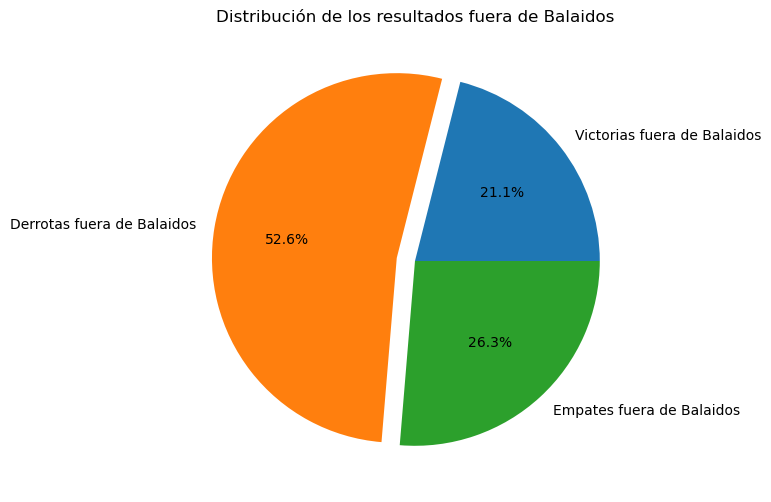

In [24]:
# Gráfico por conjunto de resultados con sus valores del Celta como visitante:

plt.figure(figsize=(10, 6))

labels= ['Victorias fuera de Balaidos', 'Derrotas fuera de Balaidos', 'Empates fuera de Balaidos']
sizes= [victory_visiting, away_visiting, tie_visiting]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados fuera de Balaidos')

plt.show()

In [25]:
# Puntos conseguidos fuera de Balaidos:

points_Celta_team_visiting = (celta_victory_visiting['Result'] == 'Away').sum() *3 + (celta_tie_visiting['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos fuera de Balaidos: ', points_Celta_team_visiting )

Total puntos conseguidos fuera de Balaidos:  17


In [26]:
# Promedio de puntos como visitante:

num_matches_away_celta = df.loc [(df['Away Team'] == "Celta Vigo")].shape[0]
porcentage_points_away_celta = points_Celta_team_visiting / num_matches_away_celta
print(f'Promedio de puntos como visitante por jornada del Celta: {porcentage_points_away_celta: .2f}')

Promedio de puntos como visitante por jornada del Celta:  0.89


In [27]:
# Puntos totales:

total_points_celta = points_Celta_team_visiting.sum() + points_home_Balaidos.sum()
print(f'Puntos totales del Celta de Vigo: {total_points_celta}')

Puntos totales del Celta de Vigo: 41


In [167]:
# Promedio de puntos por partido:

num_matches_celta = num_matches_away_celta + num_matches_home_celta
porcentage_points_celta = total_points_celta / num_matches_celta
print(f'Promedio de puntos por jornada por el Celta: {porcentage_points_celta: .2f}')

Promedio de puntos por jornada por el Celta:  1.08


In [29]:
# Analizamos la temporada con los 2 diferentes entrenadores.
# Puntos con Benitez y puntos con Giraldez:

In [30]:
# Benitez esta con el equipo desde la jornada 1 hasta la 28.
# Resultados como local:

celta_home_benitez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Home') & (df.Round < 29)]
celta_home_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
70,27,2024-03-01 00:00:00,Celta Vigo,Almeria,1,0,1,Home
144,19,2024-01-03 00:00:00,Celta Vigo,Betis,2,1,3,Home
169,17,2023-12-16 00:00:00,Celta Vigo,Granada CF,1,0,1,Home


In [31]:
celta_home_away_benitez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Away') & (df.Round < 29)]
celta_home_away_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
86,25,2024-02-17 00:00:00,Celta Vigo,Barcelona,1,2,3,Away
117,22,2024-01-28 00:00:00,Celta Vigo,Girona,0,1,1,Away
128,21,2024-01-20 00:00:00,Celta Vigo,Real Sociedad,0,1,1,Away
236,10,2023-10-21 00:00:00,Celta Vigo,Atl. Madrid,0,3,3,Away
287,5,2023-09-16 00:00:00,Celta Vigo,Mallorca,0,1,1,Away
308,3,2023-08-25 00:00:00,Celta Vigo,Real Madrid,0,1,1,Away
324,1,2023-08-13 00:00:00,Celta Vigo,Osasuna,0,2,2,Away


In [32]:
celta_home_tie_benitez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Tie') & (df.Round < 29)]
celta_home_tie_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
181,15,2023-12-04 00:00:00,Celta Vigo,Cadiz CF,1,1,2,Tie
217,12,2023-11-04 00:00:00,Celta Vigo,Sevilla,1,1,2,Tie
243,9,2023-10-08 00:00:00,Celta Vigo,Getafe,2,2,4,Tie
262,7,2023-09-28 00:00:00,Celta Vigo,Alaves,1,1,2,Tie


In [33]:
# Calculamos el número de resultados en Balaidos con Benitez:

victory_home_benitez = (celta_home_benitez['Result'] == 'Home').sum()
away_home_benitez = (celta_home_away_benitez['Result'] == 'Away').sum()
tie_home_benitez = (celta_home_tie_benitez['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta en Balaidos: ', victory_home_benitez)
print(f'Total de derrotas del Celta en Balaidos: ', away_home_benitez)
print(f'Total de empates del Celta en Balaidos: ', tie_home_benitez)

Total de victorias del Celta en Balaidos:  3
Total de derrotas del Celta en Balaidos:  7
Total de empates del Celta en Balaidos:  4


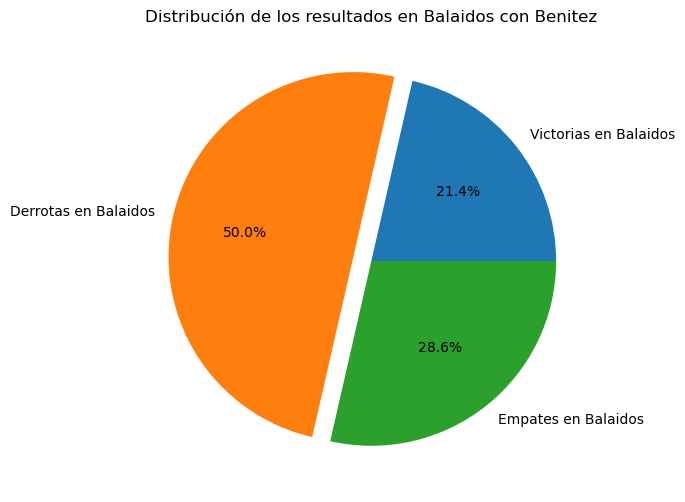

In [34]:
# Gráfico que representa el conjunto de resultados obtenidos por Benitez como local:

plt.figure(figsize=(10, 6))

labels= ['Victorias en Balaidos', 'Derrotas en Balaidos', 'Empates en Balaidos']
sizes= [victory_home_benitez, away_home_benitez, tie_home_benitez]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados en Balaidos con Benitez')

plt.show()

In [35]:
# Total de puntos conseguidos por Benitez como local:

points_home_Balaidos_benitez = (celta_home_benitez['Result'] == 'Home').sum() *3 + (celta_home_tie_benitez['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos en Balaidos con Benitez: ', points_home_Balaidos_benitez)

Total puntos conseguidos en Balaidos con Benitez:  13


In [36]:
# Promedio de puntos por jornada como local con Benitez:

num_matches_home_benitez = df.loc [(df['Home Team'] == "Celta Vigo") & (df.Round < 29)].shape[0]
porcentage_points_home_benitez = points_home_Balaidos_benitez / num_matches_home_benitez
print(f'Promedio de puntos como local por jornada del Celta de Benitez: {porcentage_points_home_benitez: .2f}')

Promedio de puntos como local por jornada del Celta de Benitez:  0.93


In [37]:
# Benitez como visitante:

celta_victory_visiting_benitez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Away') & (df.Round < 29)]
celta_victory_visiting_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
103,23,2024-02-04 00:00:00,Osasuna,Celta Vigo,0,3,3,Away
298,4,2023-09-01 00:00:00,Almeria,Celta Vigo,2,3,5,Away


In [38]:
celta_tie_visiting_benitez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Tie') & (df.Round < 29)]
celta_tie_visiting_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
75,26,2024-02-25 00:00:00,Cadiz CF,Celta Vigo,2,2,4,Tie
137,20,2024-01-13 00:00:00,Mallorca,Celta Vigo,1,1,2,Tie
172,16,2023-12-11 00:00:00,Rayo Vallecano,Celta Vigo,0,0,0,Tie
199,14,2023-11-25 00:00:00,Valencia,Celta Vigo,0,0,0,Tie
317,2,2023-08-19 00:00:00,Real Sociedad,Celta Vigo,1,1,2,Tie


In [39]:
celta_away_visiting_benitez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Home') & (df.Round < 29)]
celta_away_visiting_benitez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
53,28,2024-03-10 00:00:00,Real Madrid,Celta Vigo,4,0,4,Home
94,24,2024-02-11 00:00:00,Getafe,Celta Vigo,3,2,5,Home
156,18,2023-12-20 00:00:00,Villarreal,Celta Vigo,3,2,5,Home
210,13,2023-11-10 00:00:00,Ath Bilbao,Celta Vigo,4,3,7,Home
230,11,2023-10-27 00:00:00,Girona,Celta Vigo,1,0,1,Home
251,8,2023-10-02 00:00:00,Las Palmas,Celta Vigo,2,1,3,Home
277,6,2023-09-23 00:00:00,Barcelona,Celta Vigo,3,2,5,Home


In [40]:
# Calculamos el número de resultados como visitante con Benitez:

victory_visiting_benitez = (celta_victory_visiting_benitez['Result'] == 'Away').sum()
away_visiting_benitez = (celta_away_visiting_benitez['Result'] == 'Home').sum()
tie_visiting_benitez = (celta_tie_visiting_benitez['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta fuera de Balaidos: ', victory_visiting_benitez)
print(f'Total de derrotas del Celta fuera de Balaidos: ', away_visiting_benitez)
print(f'Total de empates del Celta fuera de Balaidos: ', tie_visiting_benitez )

Total de victorias del Celta fuera de Balaidos:  2
Total de derrotas del Celta fuera de Balaidos:  7
Total de empates del Celta fuera de Balaidos:  5


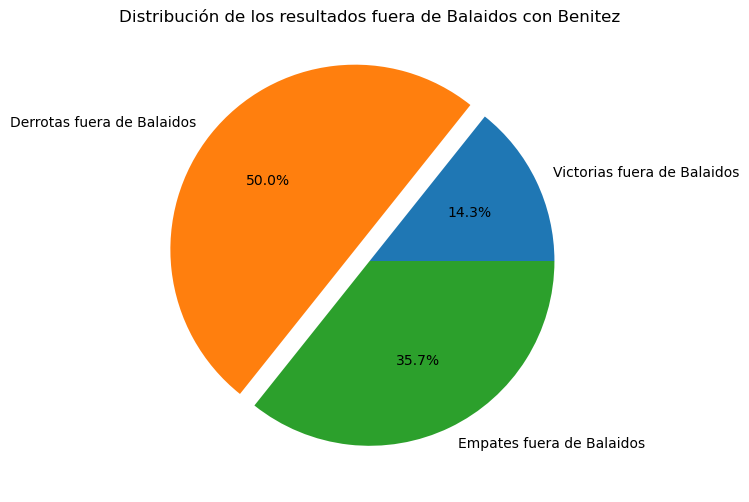

In [41]:
# Gráfico que representa el conjunto de resultados obtenidos por Benitez como visitante:

plt.figure(figsize=(10, 6))

labels= ['Victorias fuera de Balaidos', 'Derrotas fuera de Balaidos', 'Empates fuera de Balaidos']
sizes= [victory_visiting_benitez, away_visiting_benitez, tie_visiting_benitez]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados fuera de Balaidos con Benitez')

plt.show()

In [42]:
# Total de puntos conseguidos con Benitez como visitantes:

points_Celta_team_visiting_benitez = (celta_victory_visiting_benitez['Result'] == 'Away').sum() *3 + (celta_tie_visiting_benitez['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos fuera de Balaidos con Benitez: ', points_Celta_team_visiting_benitez )

Total puntos conseguidos fuera de Balaidos con Benitez:  11


In [43]:
# Promedio de puntos por jornada como visitante por Benitez:

num_matches_away_benitez = df.loc [(df['Away Team'] == "Celta Vigo") & (df.Round < 29)].shape[0]
porcentage_points_away_benitez = points_Celta_team_visiting_benitez / num_matches_away_benitez
print(f'Promedio de puntos como visitante por jornada del Celta de Benitez: {porcentage_points_away_benitez: .2f}')

Promedio de puntos como visitante por jornada del Celta de Benitez:  0.79


In [44]:
# Total de puntos conseguidos con Benitez:

total_points_celta_benitez = points_Celta_team_visiting_benitez.sum() + points_home_Balaidos_benitez.sum()
print(f'Puntos totales del Celta de Vigo hasta la jornada 28 con Benitez: {total_points_celta_benitez}')

Puntos totales del Celta de Vigo hasta la jornada 28 con Benitez: 24


In [45]:
# Promedio de puntos conseguido por Benitez por jornada:

num_matches_benitez = num_matches_away_benitez + num_matches_home_benitez
porcentage_points_benitez = total_points_celta_benitez / num_matches_benitez
print(f'Promedio de puntos por jornada por el Celta de Giráldez: {porcentage_points_benitez: .2f}')

Promedio de puntos por jornada por el Celta de Giráldez:  0.86


In [46]:
# Claudio Giraldez coje al equipo en la jornada 29.
# Resultados como local: 

celta_home_giraldez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Home') & (df.Round >= 29)]
celta_home_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
18,32,2024-04-20 00:00:00,Celta Vigo,Las Palmas,4,1,5,Home
330,34,2024-05-05 00:00:00,Celta Vigo,Villarreal,3,2,5,Home
332,36,2024-05-15 00:00:00,Celta Vigo,Ath Bilbao,2,1,3,Home


In [47]:
celta_home_away_giraldez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Away') & (df.Round >= 29)]
celta_home_away_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result


In [48]:
celta_home_tie_giraldez = df.loc[(df['Home Team']== "Celta Vigo") & (df.Result == 'Tie') & (df.Round >= 29)]
celta_home_tie_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
35,30,2024-03-31 00:00:00,Celta Vigo,Rayo Vallecano,0,0,0,Tie
334,38,2024-05-15 00:00:00,Celta Vigo,Valencia,2,2,4,Tie


In [49]:
# Calculamos el número de resultados en Balaidos con Giraldez:

victory_home_giraldez = (celta_home_giraldez['Result'] == 'Home').sum()
away_home_giraldez = (celta_home_away_giraldez['Result'] == 'Away').sum()
tie_home_giraldez = (celta_home_tie_giraldez['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta en Balaidos: ', victory_home_giraldez)
print(f'Total de derrotas del Celta en Balaidos: ', away_home_giraldez)
print(f'Total de empates del Celta en Balaidos: ', tie_home_giraldez)

Total de victorias del Celta en Balaidos:  3
Total de derrotas del Celta en Balaidos:  0
Total de empates del Celta en Balaidos:  2


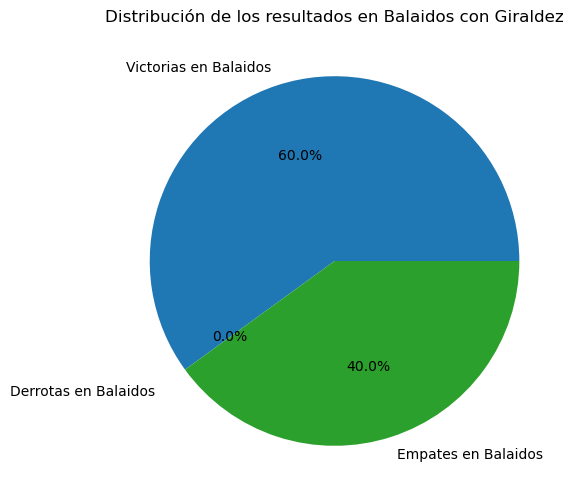

In [50]:
# Gráfico que representa el conjunto de resultados obtenidos por Giraldez como local:

plt.figure(figsize=(10, 6))

labels= ['Victorias en Balaidos', 'Derrotas en Balaidos', 'Empates en Balaidos']
sizes= [victory_home_giraldez, away_home_giraldez, tie_home_giraldez]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados en Balaidos con Giraldez')

plt.show()

In [51]:
# Total de puntos conseguido como local por Giraldez:

points_home_Balaidos_giraldez = (celta_home_giraldez['Result'] == 'Home').sum() *3 + (celta_home_tie_giraldez['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos en Balaidos con Giraldez: ', points_home_Balaidos_giraldez)

Total puntos conseguidos en Balaidos con Giraldez:  11


In [52]:
# Promedio de puntos por jornada como local por Giraldez:

num_matches_home_giraldez = df.loc [(df['Home Team'] == "Celta Vigo") & (df.Round >= 29)].shape[0]
porcentage_points_home_giraldez = points_home_Balaidos_giraldez / num_matches_home_giraldez
print(f'Promedio de puntos como local por jornada del Celta de Giraldez: {porcentage_points_home_giraldez: .2f}')

Promedio de puntos como local por jornada del Celta de Giraldez:  2.20


In [53]:
# Resultados de Giraldez como visitante:

celta_victory_visiting_giraldez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Away') & (df.Round >= 29)]
celta_victory_visiting_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
45,29,2024-03-17 00:00:00,Sevilla,Celta Vigo,1,2,3,Away
333,37,2024-05-19 00:00:00,Granada CF,Celta Vigo,1,2,3,Away


In [54]:
celta_tie_visiting_giraldez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Tie') & (df.Round >= 29)]
celta_tie_visiting_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result


In [55]:
celta_away_visiting_giraldez = df.loc[(df['Away Team']== "Celta Vigo") & (df.Result == 'Home') & (df.Round >= 29)]
celta_away_visiting_giraldez

,Round,Date,Home Team,Away Team,Home Score,Away Score,Total Goals,Result
6,33,2024-04-27 00:00:00,Alaves,Celta Vigo,3,0,3,Home
29,31,2024-04-12 00:00:00,Betis,Celta Vigo,2,1,3,Home
331,35,2024-05-12 00:00:00,Atl. Madrid,Celta Vigo,1,0,1,Home


In [56]:
# Calculamos el número de resultados del Celta como visitante con Giraldez:

victory_visiting_giraldez = (celta_victory_visiting_giraldez['Result'] == 'Away').sum()
away_visiting_giraldez = (celta_away_visiting_giraldez['Result'] == 'Home').sum()
tie_visiting_giraldez = (celta_tie_visiting_giraldez['Result'] == 'Tie').sum()

print(f'Total de victorias del Celta fuera de Balaidos con Giraldez: ', victory_visiting_giraldez)
print(f'Total de derrotas del Celta fuera de Balaidos con Giraldez: ', away_visiting_giraldez)
print(f'Total de empates del Celta fuera de Balaidos con Giraldez: ', tie_visiting_giraldez )

Total de victorias del Celta fuera de Balaidos con Giraldez:  2
Total de derrotas del Celta fuera de Balaidos con Giraldez:  3
Total de empates del Celta fuera de Balaidos con Giraldez:  0


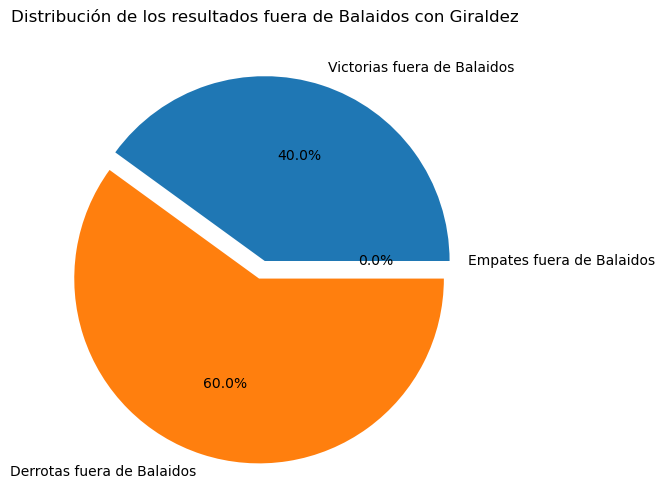

In [57]:
# Gráfico que representa el conjunto de resultados obtenidos por Giraldez como visitante:

plt.figure(figsize=(10, 6))

labels= ['Victorias fuera de Balaidos', 'Derrotas fuera de Balaidos', 'Empates fuera de Balaidos']
sizes= [victory_visiting_giraldez, away_visiting_giraldez, tie_visiting_giraldez]
explode = [0, 0.1, 0]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los resultados fuera de Balaidos con Giraldez')

plt.show()

In [58]:
# Total de puntos conseguidos como visitante por Giraldez:

points_Celta_team_visiting_giraldez = (celta_victory_visiting_giraldez['Result'] == 'Away').sum() *3 + (celta_tie_visiting_giraldez['Result'] == 'Tie').sum() *1
print(f'Total puntos conseguidos fuera de Balaidos con Giraldez: ', points_Celta_team_visiting_giraldez )

Total puntos conseguidos fuera de Balaidos con Giraldez:  6


In [59]:
# Promedio de puntos por jornada como visitante por Giraldez:

num_matches_away_giraldez = df.loc [(df['Away Team'] == "Celta Vigo") & (df.Round >= 29)].shape[0]
porcentage_points_away_giraldez = points_Celta_team_visiting_giraldez / num_matches_away_giraldez
print(f'Promedio de puntos como visitante por jornada del Celta de Giraldez: {porcentage_points_away_giraldez: .2f}')

Promedio de puntos como visitante por jornada del Celta de Giraldez:  1.20


In [60]:
# Total de puntos conseguidos por el Celta de Giraldez:

total_points_celta_giraldez = points_Celta_team_visiting_giraldez.sum() + points_home_Balaidos_giraldez.sum()
print(f'Puntos totales del Celta de Vigo desde la jornada 29 con Giraldez: {total_points_celta_giraldez}')

Puntos totales del Celta de Vigo desde la jornada 29 con Giraldez: 17


In [61]:
# Promedio de puntos por jornada del Celta de Giraldez:

num_matches_giraldez = num_matches_away_giraldez + num_matches_home_giraldez
porcentage_points_giraldez = total_points_celta_giraldez / num_matches_giraldez
print(f'Promedio de puntos por jornada del Celta de Giráldez: {porcentage_points_giraldez: .2f}')

Promedio de puntos por jornada del Celta de Giráldez:  1.70


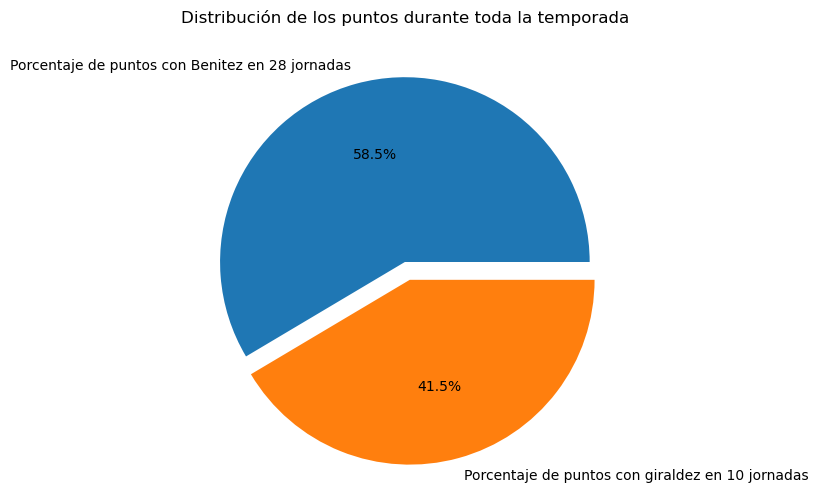

In [169]:
# Gráfico de distribucción del total de los puntos en las 38 jornadas:

plt.figure(figsize=(10, 6))

labels= ['Porcentaje de puntos con Benitez en 28 jornadas', 'Porcentaje de puntos con giraldez en 10 jornadas']
sizes= [total_points_celta_benitez,total_points_celta_giraldez ]
explode = [0, 0.1]

plt.pie(sizes, labels= labels, autopct= '%1.1f%%', explode= explode)
plt.title('Distribución de los puntos durante toda la temporada')

plt.show()

In [63]:
# Estadisticas de goles encajados, anotados y promedio por los números de partidos de cada entrenador:

# Benitez:

In [64]:
# Goles marcados como local:

goals_home_benitez = df.loc[(df['Home Team'] == "Celta Vigo") & (df['Round'] < 29),'Home Score'].sum()
print(f'Goles marcados por el Celta en casa con Benítez: ',goals_home_benitez)

Goles marcados por el Celta en casa con Benítez:  10


In [65]:
# Goles marcados como visitante:

goals_away_benitez = df.loc[(df['Away Team'] == "Celta Vigo") & (df['Round'] < 29),'Away Score'].sum()
print(f'Goles marcados por el Celta fuera de casa con Benítez: ', goals_away_benitez)

Goles marcados por el Celta fuera de casa con Benítez:  20


In [66]:
# Total de goles marcados:

total_goals_benitez = goals_home_benitez + goals_away_benitez
print(f'Goles totales marcados por el Celta de Benítez: ',total_goals_benitez)

Goles totales marcados por el Celta de Benítez:  30


In [171]:
# Promedio de goles marcados por jornada:

porcentage_goals_benitez = total_goals_benitez / num_matches_benitez
print(f'Promedio de goles marcados por jornada del Celta de Benitez: {porcentage_goals_benitez: .2f}')

Promedio de goles marcados por jornada del Celta de Benitez:  1.07


In [173]:
# Goles encajados como local:

goals_home_embedded_benitez = df.loc[(df['Home Team'] == "Celta Vigo") & (df['Round'] < 29),'Away Score'].sum()
print(f'Goles encajados por el Celta en Balaidos con Benítez: ',goals_home_embedded_benitez)

Goles encajados por el Celta en Balaidos con Benítez:  17


In [175]:
# Goles encajados como visitante:

goals_away_embedded_benitez = df.loc[(df['Away Team'] == "Celta Vigo") & (df['Round'] < 29),'Home Score'].sum()
print(f'Goles encajados por el Celta como visitante con Benítez: ',goals_away_embedded_benitez)

Goles encajados por el Celta como visitante con Benítez:  26


In [70]:
# Total de goles encajados:

total_goals_embedded_benitez = goals_home_embedded_benitez + goals_away_embedded_benitez
print(f'Goles totales encajados por el Celta de Benítez: ',total_goals_embedded_benitez)

Goles totales encajados por el Celta de Benítez:  43


In [177]:
# Promedio de goles encajados por jornada:

porcentage_goals_embedded_benitez = total_goals_embedded_benitez / num_matches_benitez
print(f'Promedio de goles encajados por jornada del Celta de Benitez: {porcentage_goals_embedded_benitez: .2f}')

Promedio de goles encajados por jornada del Celta de Benitez:  1.54


In [72]:
# Giraldez:

In [179]:
# Goles marcados como local:

df['Home Score'] = pd.to_numeric(df['Home Score'], errors='coerce').fillna(0)
goals_home_giraldez = df.loc[(df['Home Team'] == "Celta Vigo") & (df['Round'] >= 29),'Home Score'].sum()
print(f'Goles marcados por el Celta en Balaidos con Giraldez: ',goals_home_giraldez)

Goles marcados por el Celta en Balaidos con Giraldez:  11


In [181]:
# Goles marcados como visitante:

df['Away Score'] = pd.to_numeric(df['Away Score'], errors='coerce').fillna(0)
goals_away_giraldez = df.loc[(df['Away Team'] == "Celta Vigo") & (df['Round'] >= 29),'Away Score'].sum()
print(f'Goles marcados por el Celta como visitante con Giraldez: ', goals_away_giraldez)

Goles marcados por el Celta como visitante con Giraldez:  5


In [75]:
# Total de goles marcados:

total_goals_giraldez = goals_home_giraldez + goals_away_giraldez
print(f'Goles totales marcados por el Celta de Giraldez: ',total_goals_giraldez)

Goles totales marcados por el Celta de Giraldez:  16


In [183]:
# Promedio de goles marcados por jornada:

porcentage_goals_giraldez = total_goals_giraldez / num_matches_giraldez
print(f'Promedio de goles marcados por jornada del Celta de Giráldez: {porcentage_goals_giraldez: .2f}')

Promedio de goles marcados por jornada del Celta de Giráldez:  1.60


In [185]:
# Goles encajados como local:

goals_home_embedded_giraldez = df.loc[(df['Home Team'] == "Celta Vigo") & (df['Round'] >= 29),'Away Score'].sum()
print(f'Goles encajados por el Celta en Balaidos con Giraldez: ',goals_home_embedded_giraldez)

Goles encajados por el Celta en Balaidos con Giraldez:  6


In [187]:
# Goles encajados como visitante:

goals_away_embedded_giraldez = df.loc[(df['Away Team'] == "Celta Vigo") & (df['Round'] >=29),'Home Score'].sum()
print(f'Goles encajados por el Celta como visitante con Giradez: ',goals_away_embedded_giraldez)

Goles encajados por el Celta como visitante con Giradez:  8


In [79]:
# Total de goles encajados:

total_goals_embedded_giraldez = goals_home_embedded_giraldez + goals_away_embedded_giraldez
print(f'Goles totales encajados por el Celta de Giraldez: ',total_goals_embedded_giraldez)

Goles totales encajados por el Celta de Giraldez:  14


In [189]:
# Promedio de goles encajados por jornada:

porcentage_goals_embedded_giraldez = total_goals_embedded_giraldez / num_matches_giraldez
print(f'Promedio de goles encajados por jornada del Celta de Giráldez: {porcentage_goals_embedded_giraldez: .2f}')

Promedio de goles encajados por jornada del Celta de Giráldez:  1.40


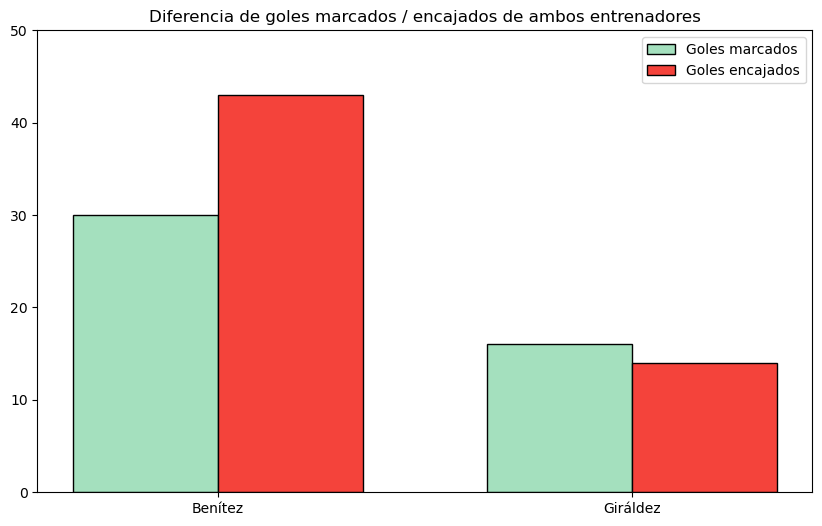

In [190]:
# Gráfico de barras que representa la diferencia ente goles encajados y marcados entre ambos entrenadores:

plt.figure(figsize=(10,6))

# Datos en orden Benítez - Giráldez
goals_scored = [total_goals_benitez, total_goals_giraldez]
goals_conceded = [total_goals_embedded_benitez, total_goals_embedded_giraldez]

x = np.arange(len(goals_scored))  # [0, 1]
width = 0.35

b1 = plt.bar(x - width/2, goals_scored, width=width, color="#A4E0BE", edgecolor="black", label="Goles marcados")
g1 = plt.bar(x + width/2, goals_conceded, width=width, color="#F4433B", edgecolor="black", label="Goles encajados")

# Etiquetas y estilo
plt.xticks(x, ['Benítez', 'Giráldez'])
plt.yticks(range(0, max(goals_scored + goals_conceded) + 10, 10))
plt.legend()
plt.title('Diferencia de goles marcados / encajados de ambos entrenadores')

plt.show()
